In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('IMDB Dataset.csv', index=False, encoding='utf-8')

NameError: ignored

In [ ]:
df.head()

,review,sentiment
0,I haven't seen every single movie that Burt Re...,1
1,Russian actress TATIANA SAMOILOVA reminds me s...,1
2,A bunch of full-length movies featuring the Mu...,1
3,"I'm out of words to describe the beauty of ""Th...",1
4,What happened to Ava Gardner in the 1940s and ...,1


In [ ]:
reviews = df.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

199786


['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

In [ ]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

frequency_dist = nltk.FreqDist(tokens)
tokens = list(filter(lambda token: token not in string.punctuation, tokens))
tokens=[tokens for word in tokens if word.isalpha()]
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

['br',
 'I',
 "'s",
 'The',
 'movie',
 'film',
 "''",
 "n't",
 '``',
 'one',
 'like',
 'It',
 'This',
 'good',
 'would',
 '...',
 'time',
 'really',
 'see',
 'even',
 'story',
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'well',
 'first',
 'made',
 'also',
 'make',
 'way',
 'movies',
 'But',
 'think',
 'characters',
 'character',
 'And',
 'films',
 'seen',
 'watch',
 'many',
 'acting',
 'plot',
 'know',
 'never',
 'two',
 'A',
 'There']

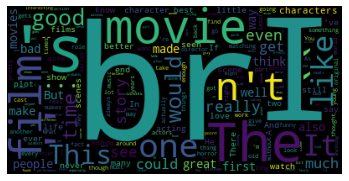

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 73822) (25000, 73822)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.83664
